In [1]:
import cv2 as cv
import sys
import pywt

import numpy as np
from matplotlib import pyplot as plt

import os

In [2]:
# Reading the photo. If the size of the photo is length * width, img is a matrix of dimension length * width * 3
img = cv.imread("faces_6class/face_highRenaiss/pala-di-sant-agostino-st-bartolomeo-1523.jpg")
# Split in blue, green and red. Now, the matrices are bidimensional: length * width
b,g,r = cv.split(img)

# Color Histogram

In [3]:
def get_color_histogram(img):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    n_channels = hsv.shape[2]
    channels = list(range(n_channels))
    sizes = [8,]*n_channels
    ranges = [0, 256]*n_channels
    hist = cv.calcHist(hsv, channels, None, sizes, ranges)
    return hist

In [4]:
# RGB to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
print(hsv.shape)

# Creating the histogram of size 8x8x8
n_channels = hsv.shape[2]
channels = list(range(n_channels))
sizes = [8,]*n_channels
ranges = [0, 256]*n_channels
hist = cv.calcHist(hsv, channels, None, sizes, ranges)
print(hist)

(537, 537, 3)
[[[474.   1.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]]

 [[  1.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   9.   3.   0.   0.   0.   0.   0.]
  [  0.   0.   2.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]]

 [[  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   2.   0.   0.   0.   0.   0.   0.]
  [  0.   1. 101.   7.   0.   0.   0.   0.]
  [  0.   0.   7.   1.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.  

# WBCH

In [5]:
def get_texture_histogram(img):
    b,g,r = cv.split(img)
    approx = []
    horiz = []
    vert = []
    for x in [b,g,r]:
        cA, (cH, cV, _) = pywt.dwt2(x, 'haar')
        approx.append(cA)
        horiz.append(cH)
        vert.append(cV)
    img_approx = cv.merge(approx)
    img_horiz = cv.merge(horiz)
    img_vert = cv.merge(vert)
    # Step 5: assign weights to approx, horiz, and vert
    new_img = cv.addWeighted(img_approx, 0.75, img_horiz, 0.25, 0.0)
    new_img = cv.addWeighted(new_img, 0.8, img_vert, 0.2, 0.0)
    return get_color_histogram(new_img.astype('float32'))

In [6]:
# In order the returns are: Approximation, horizontal detail, vertical detail and diagonal detail 
approx = []
horiz = []
vert = []
for x in [b,g,r]:
    cA, (cH, cV, _) = pywt.dwt2(x, 'haar')
    approx.append(cA)
    horiz.append(cH)
    vert.append(cV)

In [7]:
# We create three new images: one with the approximation transformation, other with the horizontal detail and finally with the vertical one
img_approx = cv.merge(approx)
img_horiz = cv.merge(horiz)
img_vert = cv.merge(vert)


In [8]:
# cv.imshow("approx",img_approx)
# cv.waitKey(0)

# I don't know if this is okay
# Step 5: assign weights to approx, horiz, and vert
new_img = cv.addWeighted(img_approx, 0.75, img_horiz, 0.25, 0.0)
new_img = cv.addWeighted(new_img, 0.8, img_vert, 0.2, 0.0)
print(np.shape(new_img))

# Step 6: convert to HSV
hsv = cv.cvtColor(new_img.astype('float32'), cv.COLOR_BGR2HSV)

(269, 269, 3)


In [9]:
# Creating the histogram of size 8x8x8
n_channels = hsv.shape[2]
channels = list(range(n_channels))
sizes = [8,]*n_channels
ranges = [0, 255]*n_channels
hist = cv.calcHist(hsv, channels, None, sizes, ranges)
print('Output histogram shape: ', hist.shape)
print(hist)

Output histogram shape:  (8, 8, 8)
[[[425.   6.   0.   0.   0.   0.   0.   0.]
  [  0.   1.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]]

 [[  7.   1.   0.   0.   0.   0.   0.   0.]
  [  8.  59.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]]

 [[  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   1.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   7.   6.   0.   0.   0.   0.]
  [  0.   0.   0.  12.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.

# Distance Metric

## Histogram intersection

In [10]:
def get_distance(histA,histB):
    histA = histA.flatten()
    histA = histA/(sum(histA))
    histB = histB.flatten()
    histB = histB/(sum(histB))
    denominator = min(np.sum(histA),np.sum(histB))
    numerator = 0
    for i in range(0,8*8*8):
        minimum = histA[i] if histA[i] < histB[i] else histB[i]
        numerator = numerator+minimum
    return 1-numerator/denominator

# Image matching

In [16]:
def get_best_match(queryfilepath):
    Q = cv.imread(queryfilepath)
    directory = 'faces_6class'
    min_dist = float('inf')
    Q_best_match = np.zeros(Q.shape)
    Q_best_match_movement = ''
    
    for folder in os.listdir(directory):
        folderpath = os.path.join(directory,folder)
        if os.path.isdir(folderpath):
            for file in os.listdir(folderpath):
                filepath = os.path.join(folderpath,file)
                if os.path.isfile(filepath):
                    D = cv.imread(filepath)
                    Q_hist_color = get_color_histogram(Q)
                    D_hist_color = get_color_histogram(D)
                    Q_hist_texture = get_texture_histogram(Q)
                    D_hist_texture = get_texture_histogram(D)
                    dist_color = get_distance(Q_hist_color,D_hist_color)
                    dist_texture = get_distance(Q_hist_texture,D_hist_texture)
                    dist = (dist_color+dist_texture)/2
                    if dist < min_dist and filepath != queryfilepath:
                        min_dist = dist
                        Q_best_match = D
                        Q_best_match_movement = folder
    print(dist)
    return Q_best_match, Q_best_match_movement

0.2731443811879961


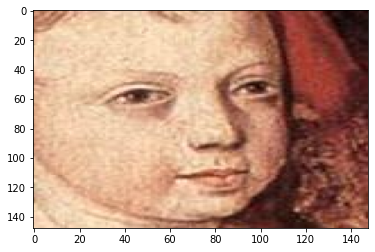

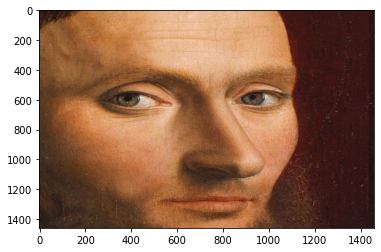

Query movement is:  face_NorthernRenaiss
Match movement is:  face_NorthernRenaiss


In [17]:
queryfilepath = "faces_6class/face_NorthernRenaiss/the-virgin-and-child.jpg"
Q = cv.imread(queryfilepath)

Q_best_match, Q_best_match_movement = get_best_match(queryfilepath)

plt.imshow(cv.cvtColor(Q, cv.COLOR_BGR2RGB),aspect="auto")
plt.show()

plt.imshow(cv.cvtColor(Q_best_match, cv.COLOR_BGR2RGB),aspect="auto")
plt.show()

print("Query movement is: ", queryfilepath.split('/')[1])
print("Match movement is: ",Q_best_match_movement)